In [ ]:
from datetime import datetime
import pandas as pd
import seaborn as sns

In [ ]:
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [ ]:
pd.set_option("display.width", 70)

In [ ]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

# **Визуальное исследование датасета**

Оценим распределение целевого признака — оценки по математике:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


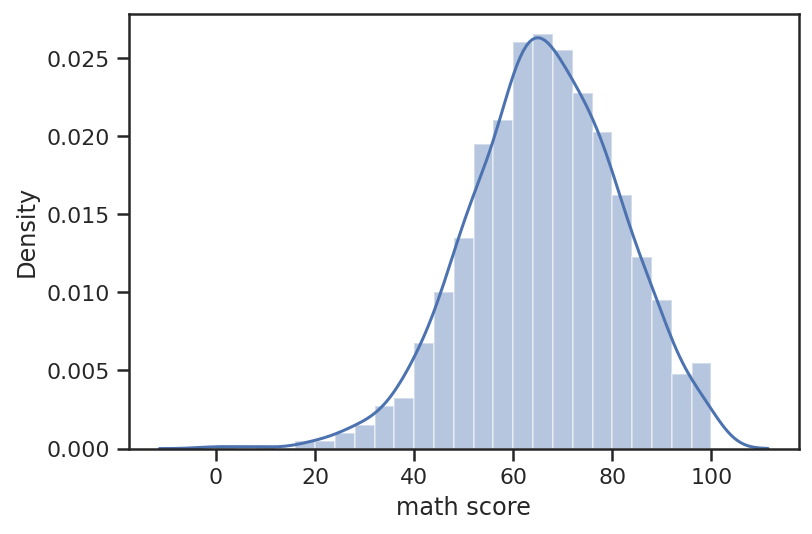

In [ ]:
sns.distplot(data["math score"]);

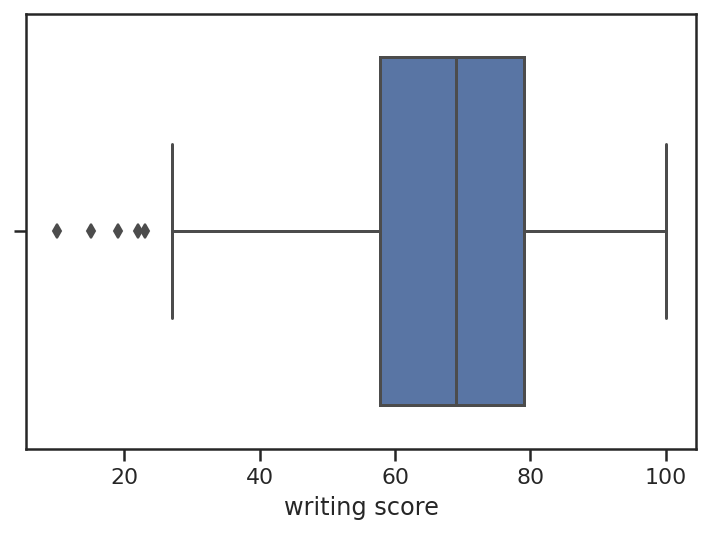

In [ ]:
sns.boxplot(x=data['writing score'])

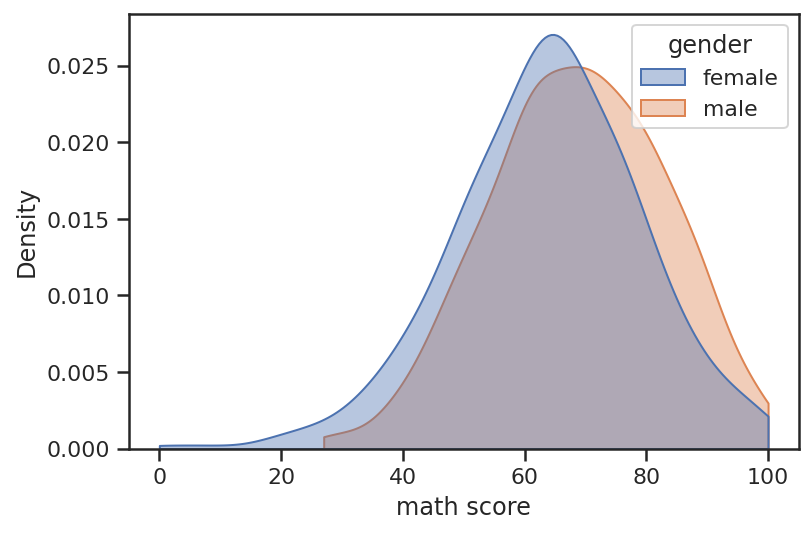

In [ ]:
sns.kdeplot(data=data, x="math score", hue="gender", cut=0, fill=True, common_norm=False, alpha=0.4)

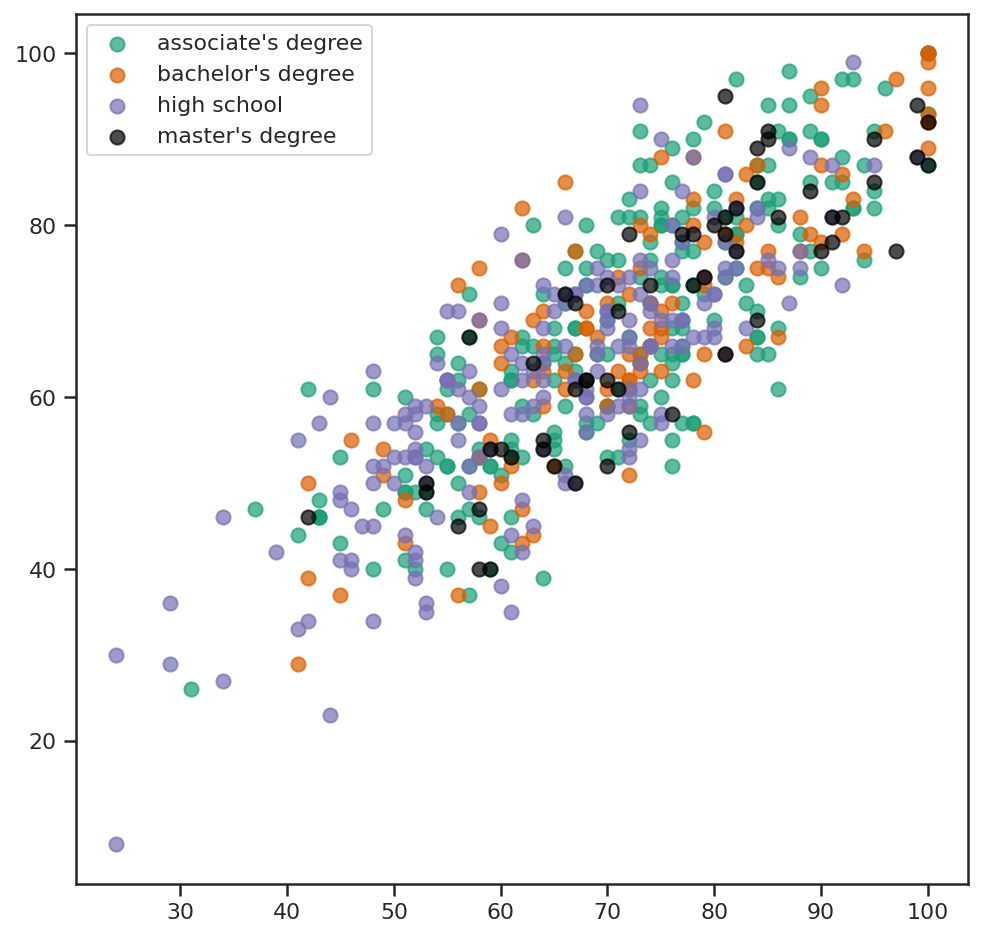

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
FLIPPER_LENGTH = data["reading score"].values
BILL_LENGTH = data["math score"].values

SPECIES = data["parental level of education"].values
SPECIES_ = np.unique(SPECIES)

COLORS = ["#1B9E77", "#D95F02", "#7570B3", "#000000"]

fig, ax = plt.subplots(figsize=(8,8))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
ax.legend();

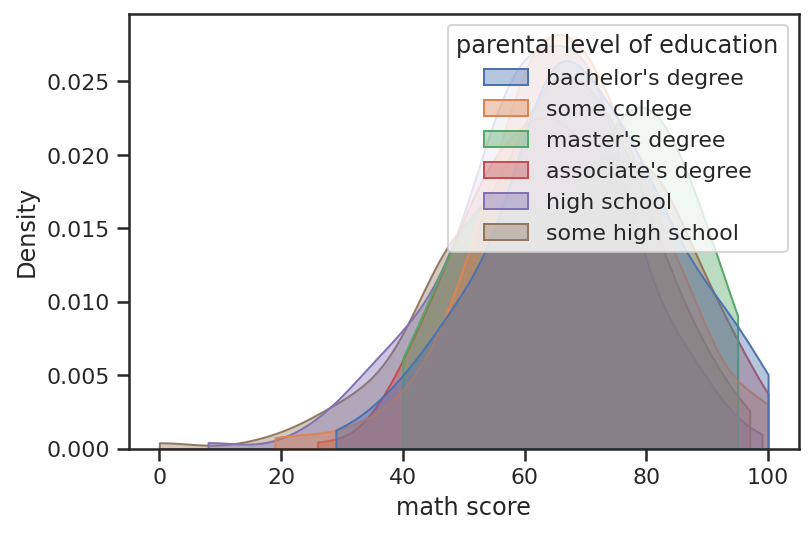

In [ ]:
sns.kdeplot(data=data, x="math score", hue="parental level of education", cut=0, fill=True, common_norm=False, alpha=0.4)

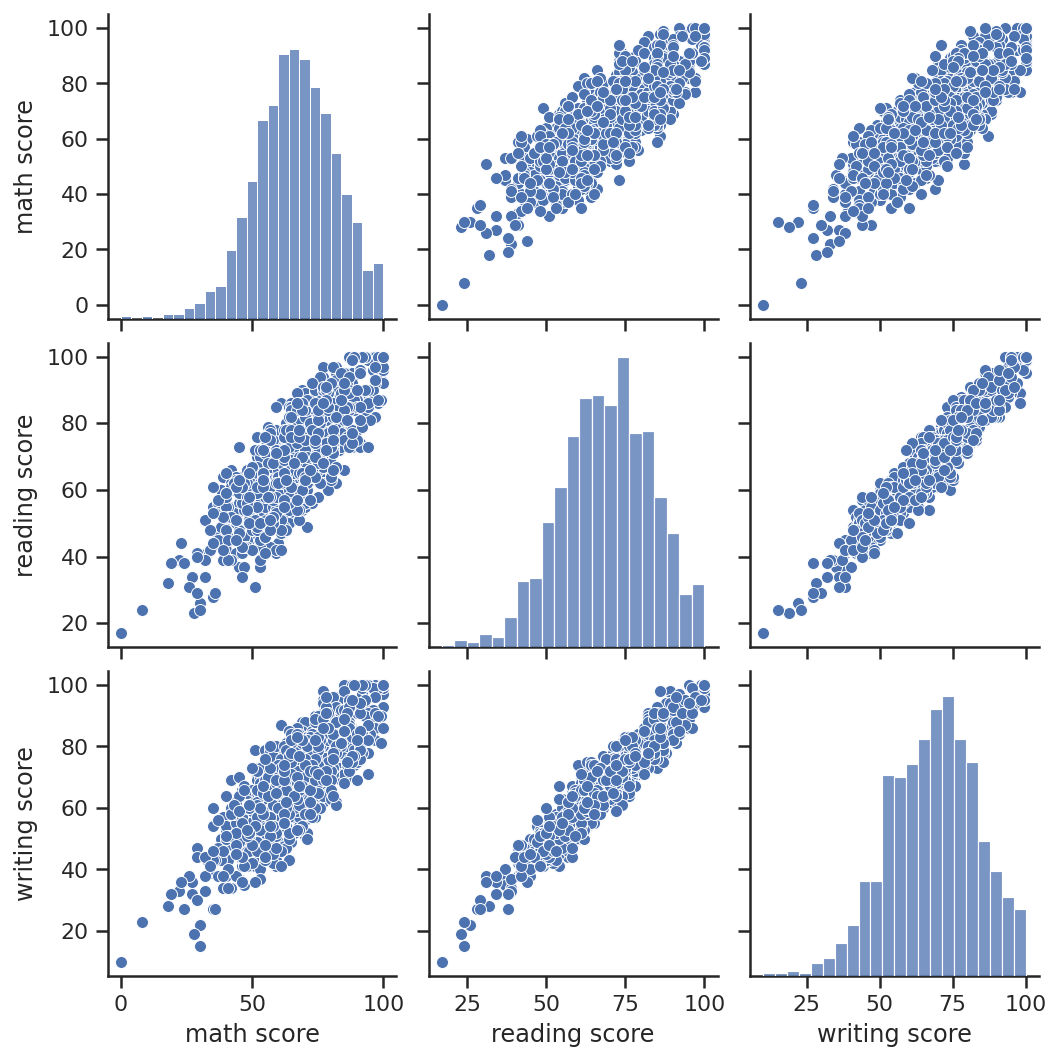

In [ ]:
sns.pairplot(data)

# Корреляции признаков

In [ ]:
corr_matrix = data.corr()

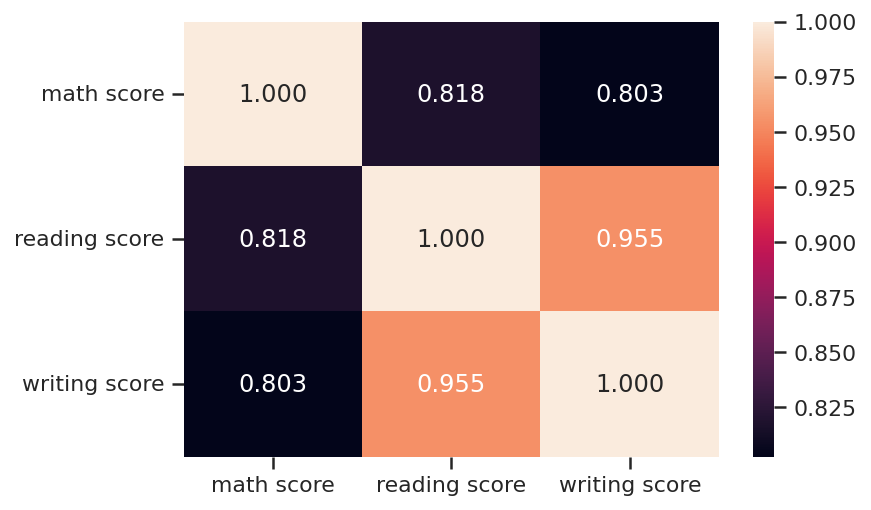

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')